# Time-mean MLD: Year 121 to 150

# Low-resolution interactive Ensemble

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cmo
import glob
import sys
from scipy import signal
from scipy.stats import pearsonr
import cartopy.crs as ccrs

In [2]:
front_ds = xr.open_dataset('./MLD_stats/ACC_front.nc')

In [3]:
LatSACCF, LonSACCF = front_ds.LatSACCF.data[:-1], front_ds.LonSACCF.data[:-1]

In [4]:
LatSAF, LonSAF = front_ds.LatSAF.data[:-1], front_ds.LonSAF.data[:-1]

In [5]:
LatPF, LonPF = front_ds.LatPF.data[:-1], front_ds.LonPF.data[:-1]

## Low resolution - Interactive ensemble

In [13]:
LRIE_ds = xr.open_dataset('./MLD_stats/MLD_LRC_LRIE_121_150.nc')

<xarray.DataArray 'MLD_LRIE' ()>
array(-975.27925944)

In [7]:
low_south, low_north= 30, 93

In [168]:
MLD_LRIE = LRIE_ds.MLD_LRIE #[:, low_south:low_north] #.resample(time = '1MS').mean('time')

In [209]:
%%time
MLD_LRIE_data = np.ma.masked_less(MLD_LRIE.data, 10)

CPU times: user 26.6 ms, sys: 13.6 ms, total: 40.2 ms
Wall time: 37.4 ms


In [210]:
lon_LR, lat_LR = LRIE_ds.lon, LRIE_ds.lat

## Low resolution - Control

In [211]:
polar_extent = [-180, 180, -90, -30]

In [212]:
%%time
LRCT_ds = xr.open_dataset('./MLD_stats/MLD_LRC_LRIE_121_150.nc')

CPU times: user 9.85 ms, sys: 3.12 ms, total: 13 ms
Wall time: 11.4 ms


In [213]:
MLD_LRCT = LRCT_ds.MLD_LRC #[:, low_south:low_north]

In [214]:
%%time
MLD_LRC_data = np.ma.masked_less(MLD_LRCT.data , 10)
#MLD_LRIE_data

CPU times: user 23.1 ms, sys: 24.3 ms, total: 47.3 ms
Wall time: 46.7 ms


In [215]:
MLD_LRIE_T = MLD_LRIE_data.mean(axis = 0)
MLD_LRC_T = MLD_LRC_data.mean(axis = 0)

In [216]:
MLD_LRIE_std = MLD_LRIE_data.std(axis = 0)
MLD_LRC_std = MLD_LRC_data.std(axis = 0)

In [217]:
MLD_LRC_LRIE = MLD_LRC_T / MLD_LRIE_T

In [218]:
MLD_LRC_LRIE_std = MLD_LRC_std - MLD_LRIE_std

In [219]:
TLAT_low = np.ma.masked_equal(LRIE_ds.lat , -1.0)
TLONG_low = np.ma.masked_equal(LRIE_ds.lon , -1.0)

In [220]:
mld_min, mld_max = 50, 150

In [221]:
mld_diff_min, mld_diff_max = -50, 50

In [222]:
mld_ratio_min,  mld_ratio_max = 0, 2

In [223]:
mld_ratio_min, mld_ratio_max = 0.5, 1.5

# HR stats

In [224]:
HR_ds = xr.open_dataset('./MLD_stats/MLD_MEAN_STD_HRC_HRIE_121_150.nc')
HR_ds

<xarray.Dataset>
Dimensions:        (y: 320, x: 3600)
Dimensions without coordinates: y, x
Data variables:
    MLD_HRIE_mean  (y, x) float64 ...
    MLD_HRIE_std   (y, x) float64 ...
    MLD_HRC_mean   (y, x) float64 ...
    MLD_HRC_std    (y, x) float64 ...
    lon            (x) float32 ...
    lat            (y) float32 ...

In [248]:
# MLD_HRIE_mean = np.ma.masked_less(HR_ds.MLD_HRIE_mean[:-30], 10)
# MLD_HRC_mean = np.ma.masked_less(HR_ds.MLD_HRC_mean[:-30], 10)

In [300]:
MLD_HRIE_mean = np.ma.masked_less(HR_ds.MLD_HRIE_mean, 10)
MLD_HRC_mean = np.ma.masked_less(HR_ds.MLD_HRC_mean, 10)

In [301]:
MLD_mean_HRC_HRIE = MLD_HRC_mean - MLD_HRIE_mean

In [302]:
MLD_HRIE_std = HR_ds.MLD_HRIE_std # [:-30]
MLD_HRC_std = HR_ds.MLD_HRC_std #[:-30]

In [303]:
MLD_std_HRC_HRIE = MLD_HRC_std - MLD_HRIE_std

In [304]:
# lon_HR, lat_HR = np.meshgrid(HR_ds.lon.data[ :], HR_ds.lat.data[:-30])
lon_HR, lat_HR = np.meshgrid(HR_ds.lon.data[ :], HR_ds.lat.data)

In [305]:
mld_min, mld_max = 50, 150

In [306]:
mld_diff_min, mld_diff_max = -50, 50

In [307]:
MLD_Mean_ratio = MLD_LRIE_T / MLD_LRC_T
MLD_HR_Mean_ratio = MLD_HRIE_mean/MLD_HRC_mean

In [308]:
mld_min, mld_max = 50, 250

In [309]:
MLD_LRC_data.shape

(360, 63, 320)

In [310]:
MLD_Mean_ratio = MLD_LRIE_T / MLD_LRC_T
MLD_HR_Mean_ratio = MLD_HRIE_mean/MLD_HRC_mean

# Surface EKE

# Time-mean - year 121 to 150

# LR

In [311]:
eke_lr = xr.open_dataset('./EKE/EKE_LRIE_LRC_0121_to_0150.nc')
eke_lr

<xarray.Dataset>
Dimensions:   (time: 360, y: 63, x: 320)
Dimensions without coordinates: time, y, x
Data variables:
    EKE_LRC   (time, y, x) float32 ...
    EKE_LRIE  (time, y, x) float32 ...
    lat       (y, x) float64 ...
    lon       (y, x) float64 ...

In [312]:
eke_lr_ratio = eke_lr.EKE_LRIE.mean(axis = 0)/eke_lr.EKE_LRC.mean(axis = 0)

In [313]:
EKE_LRC = eke_lr.EKE_LRC.mean(axis = 0)
EKE_LRIE = eke_lr.EKE_LRIE.mean(axis = 0)

In [314]:
TLONG_low, TLAT_low = eke_lr.lon.data, eke_lr.lat.data

# HR

In [315]:
eke_hr = xr.open_dataset('./EKE/EKE_MEAN_HRIE_HRC_YR0121_to_0150.nc')
eke_hr

<xarray.Dataset>
Dimensions:   (lat: 320, lon: 3600)
Coordinates:
  * lat       (lat) float32 -61.95 -61.85 -61.75 -61.65 ... -30.25 -30.15 -30.05
  * lon       (lon) float32 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
Data variables:
    EKE_HRC   (lat, lon) float32 ...
    EKE_HRIE  (lat, lon) float32 ...

In [316]:
EKE_HRC = eke_hr.EKE_HRC#[:-30]
EKE_HRIE = eke_hr.EKE_HRIE#[:-30]

In [317]:
eke_hr_ratio = eke_hr.EKE_HRIE/eke_hr.EKE_HRC

In [318]:
X_HR, Y_HR =np.meshgrid(eke_hr.lon.data, eke_hr.lat.data) 

/Users/yugao/opt/miniconda3/envs/pyenv/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/yugao/opt/miniconda3/envs/pyenv/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


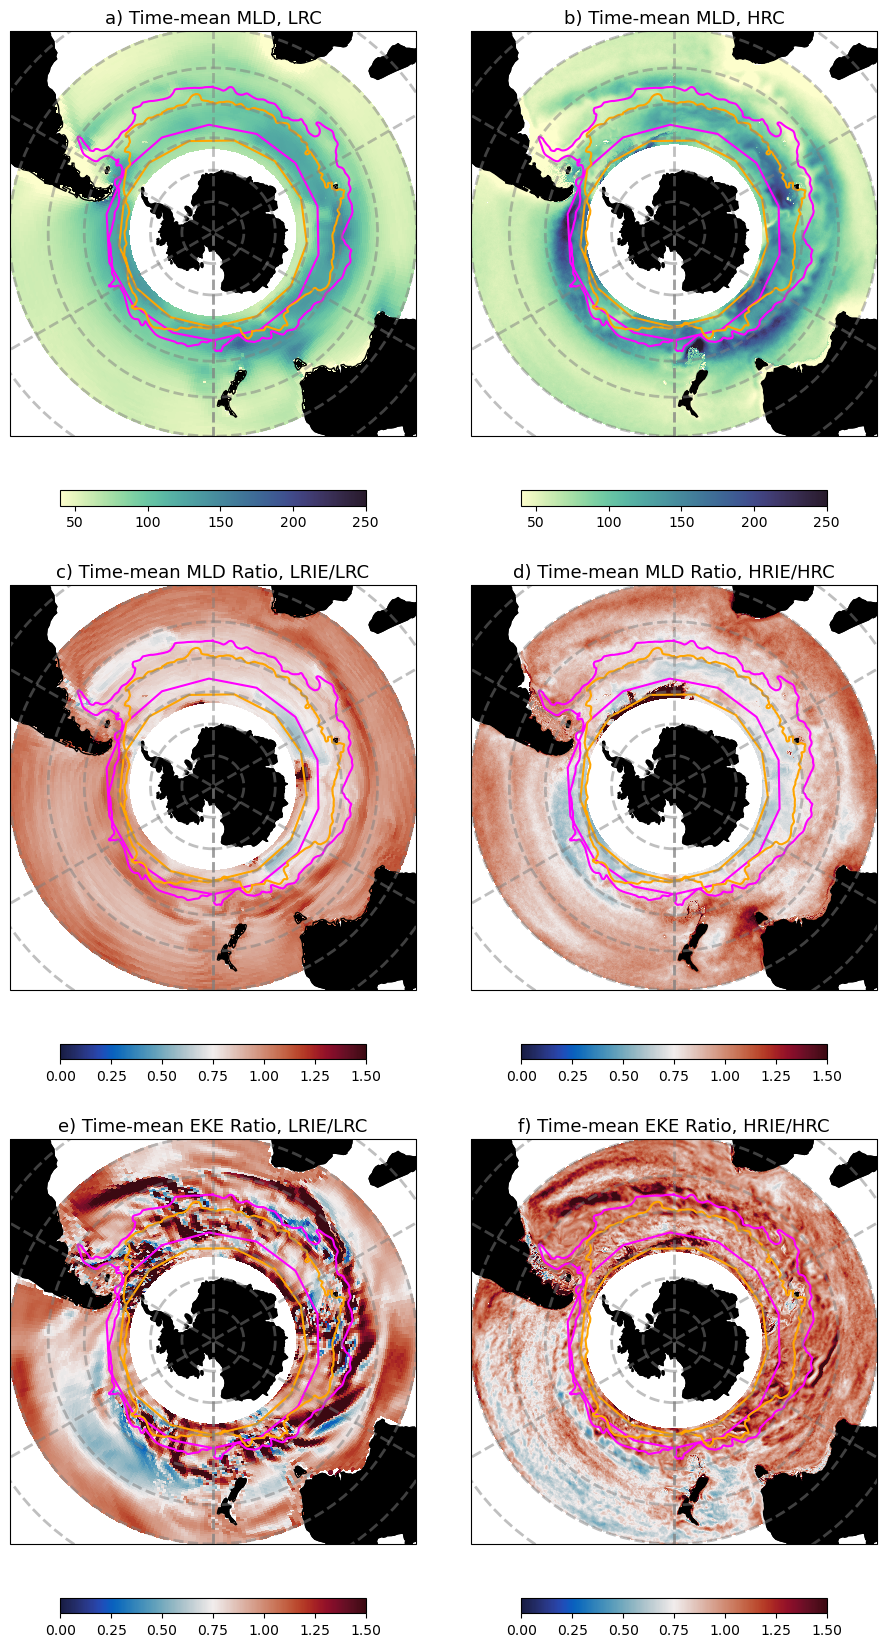

In [319]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import numpy as np

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 17), subplot_kw={'projection': ccrs.SouthPolarStereo()})
cmap = cmo.balance

# Assuming a predefined polar_extent variable
# polar_extent = [-180, 180, -90, -50] for example

# Configure common attributes for all six plots
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_extent(polar_extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, color='black')
    ax.coastlines()
    ax.plot(LonSAF, LatSAF, 'magenta', label='SAF', transform=ccrs.PlateCarree())
    ax.plot(LonPF, LatPF, 'orange', label='PF', transform=ccrs.PlateCarree())

    # Gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

# You can use the following structure to plot your data for all six plots.
# Note: Replace data and color limits as necessary for each plot

# First plot
cs1 = ax1.pcolormesh(lon_LR, lat_LR, MLD_LRC_T, vmin= 40, vmax= 250, transform=ccrs.PlateCarree(), cmap=cmo.deep)
plt.colorbar(cs1, ax=ax1, orientation='horizontal', shrink=0.6, pad=0.1)
ax1.set_title('a) Time-mean MLD, LRC', fontsize = 13)

# Second plot
cs2 = ax2.pcolormesh(lon_HR, lat_HR, MLD_HRC_mean, vmin = 40, vmax = 250, transform=ccrs.PlateCarree(), cmap=cmo.deep)
plt.colorbar(cs2, ax=ax2, orientation='horizontal', shrink=0.6, pad=0.1)
ax2.set_title('b) Time-mean MLD, HRC', fontsize = 13)

cs3 = ax3.pcolormesh(lon_LR, lat_LR, MLD_Mean_ratio , vmin = 0, vmax = 1.5, transform=ccrs.PlateCarree(), cmap=cmo.balance)  
plt.colorbar(cs3, ax=ax3, orientation='horizontal', shrink=0.6, pad=0.1)
ax3.set_title('c) Time-mean MLD Ratio, LRIE/LRC', fontsize = 13)


cs4 = ax4.pcolormesh(lon_HR, lat_HR, MLD_HR_Mean_ratio, vmin = 0, vmax = 1.5, transform=ccrs.PlateCarree(), cmap=cmo.balance)  
plt.colorbar(cs4, ax=ax4, orientation='horizontal', shrink=0.6, pad=0.1)
ax4.set_title('d) Time-mean MLD Ratio, HRIE/HRC', fontsize = 13)


cs5 = ax5.pcolormesh(lon_LR, lat_LR, eke_lr_ratio, vmin = 0, vmax = 1.5, transform=ccrs.PlateCarree(), cmap=cmo.balance)  
plt.colorbar(cs5, ax=ax5, orientation='horizontal', shrink=0.6, pad=0.1)
ax5.set_title('e) Time-mean EKE Ratio, LRIE/LRC', fontsize = 13)

# cbar_options = { 'orientation': "horizontal", 'shrink':0.7, 'fraction':.05, 'pad':.1,'ticks': [0, .1, 0.5, 1, 1.5, 2], 'extend':'both'}
# cbar = fig.colorbar(cs5, cax =cbaxes, **cbar_options)

cs6 = ax6.pcolormesh(lon_HR, lat_HR, eke_hr_ratio, vmin = 0, vmax = 1.5, transform=ccrs.PlateCarree(), cmap=cmo.balance)  
plt.colorbar(cs6, ax=ax6, orientation='horizontal', shrink=0.6, pad=0.1)
ax6.set_title('f) Time-mean EKE Ratio, HRIE/HRC', fontsize = 13)

# cbar_options = { 'orientation': "horizontal", 'shrink':0.7, 'fraction':.05, 'pad':.1,'ticks': [0, .1, 0.5, 1, 1.5, 2], 'extend':'both'}
# cbar = fig.colorbar(cs6, cax =cbaxes, **cbar_options)


plt.tight_layout()
plt.savefig('MLD_mean.png', dpi=300)
plt.show()


In [320]:
lon_HR.shape, lat_HR.shape, eke_hr_ratio.shape

((320, 3600), (320, 3600), (320, 3600))